In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

# Finding the value of $\pi$

In [2]:
N = 10000
r = 1
c = [2,4]

xs = (c[0]-r)+2*r*np.random.rand(N)
ys = (c[1]-r)+2*r*np.random.rand(N)

inside = (xs-c[0])**2 + (ys-c[1])**2 <= r**2
print(4*inside.sum()/len(inside))

3.1252


<IPython.core.display.Javascript object>


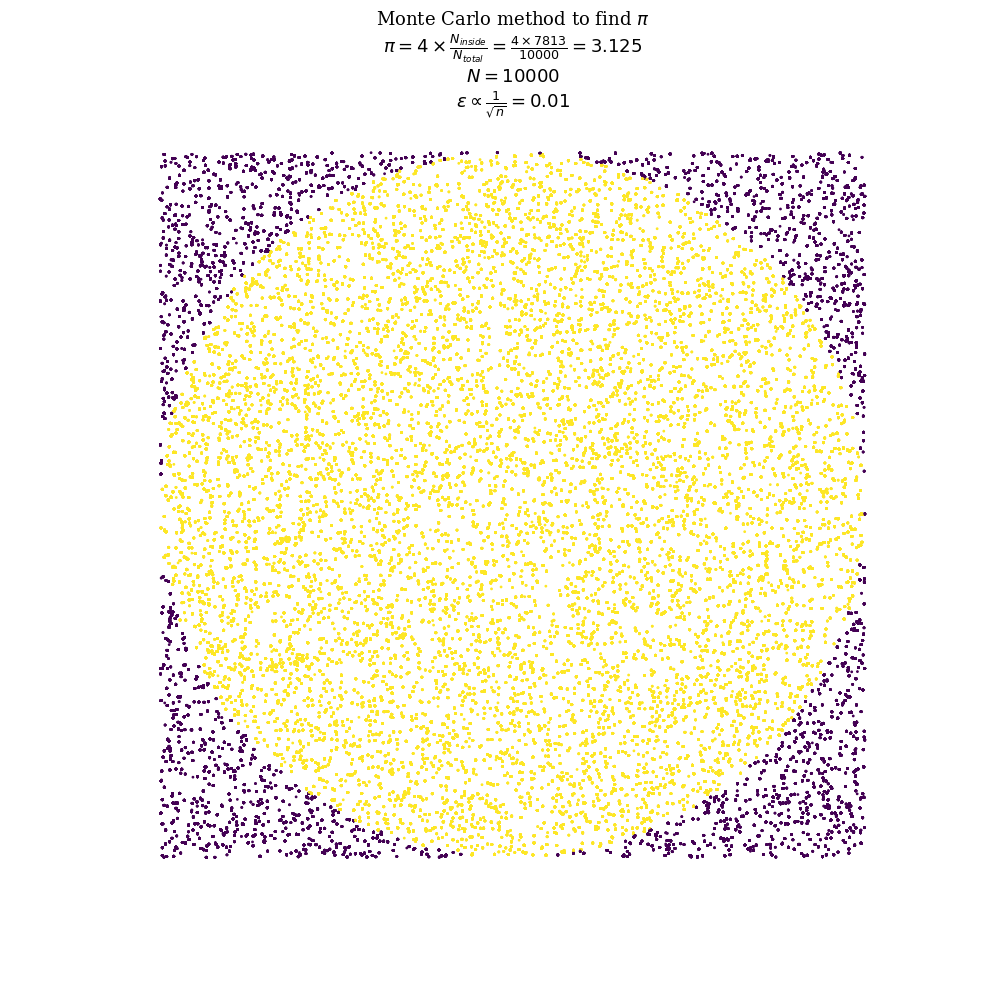

In [3]:
fig = plt.figure(figsize=(10,10))
step = 200
frames = [(i+1)*step for i in range(int(N/step))]

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 13}

def init_func():
    pass

def draw(i):
    plt.scatter(xs[0:i], ys[0:i], c=inside[0:i], s=1)
    plt.title("Monte Carlo method to find $\pi$\n" +
              "$\pi = 4\\times \\frac{N_{inside}}{N_{total}} = $" +
              "$ \\frac{4\\times%.i}{%.i} = $" %(inside[0:i].sum(), len(inside[0:i])) + 
              f"${4*inside[0:i].sum()/len(inside[0:i]):.3f}$\n$" +
              f"N = {len(inside[0:i])}$\n" +
              "$\epsilon \propto  \\frac{1}{\\sqrt{n}} = %.2f$"%(1/np.sqrt(len(inside[0:i])) ),
              fontdict=font_title
             ) 
    plt.axis("off")
    plt.axis("equal")

animation = FuncAnimation(plt.gcf(), draw, frames=frames, interval=10, repeat=False, init_func=init_func)
#animation.save('./Montecarlo_pi.gif', writer='ffmpeg')

# Monte Carlo Integration

The integration of the function $f(x)$ in the open interval $(a,b)$ can be estimated by using the Monte Carlo method:

\begin{equation}
    \int_a^b f(x)dx \approx \frac{b-a}{N} \sum_{i=1}^{N}f(x_i)
\end{equation}

where the $x_i$ are random numbers such that $X \sim U(a,b)$. We can also find the value of the integral not by using the expected value of $f(x)$ but using the proportion of points under $f(x)$ respect to the total amount of points. But this case the function must be positive in the open interval $(a,b)$, it is $f(x) \geq 0 $ for $x \in (a,b)$:

\begin{equation}
    \int_a^b f(x)dx \approx M(b-a)\frac{N_{in}}{N_{total}}
\end{equation}

$M$ is the maximum value of $f(x)$ in the interval $(a,b)$.

In [26]:
def mc1_integrate(f, a, b, N=1000000, **kwards):
    xs = a + (b-a)*np.random.rand(N)
    ys = f(xs, **kwards)
    
    return (b-a)*np.sum(ys)/N

def mc2_integrate(f, a, b, N=1000000, **kwards):
    M  = np.max(f(np.linspace(a, b, 100), **kwards))
    
    xs = a + (b-a)*np.random.rand(N)
    ys = M*np.random.rand(N)
    
    inside = ys <= f(xs, **kwards)
    
    return M*(b-a)*inside.sum()/N

Lets test this method by integrating the function $f(x) = 2\sqrt{1 - x^2}$ in the interval $(-1,1)$. The result of this integral matches $\pi$: 

\begin{equation}
    \int_{-1}^1 \sqrt{1 - x^2}dx = \frac{\pi}{2}
\end{equation}

\begin{equation}
    2\int_{-1}^1 \sqrt{1 - x^2}dx = \pi
\end{equation}

In [83]:
def func(x, r):
    return np.sqrt(r**2-x**2)

dic = {"r":2}